In [4]:

import tensorflow as tf 
from keras.utils import np_utils 
from matplotlib import pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10. load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
print('Training images : {}'.format(x_train.shape))
print('Testing images : {}'.format(x_test.shape))

Training images : (50000, 32, 32, 3)
Testing images : (10000, 32, 32, 3)


In [7]:
print(x_train[0].shape)

(32, 32, 3)


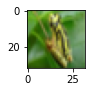

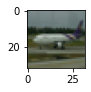

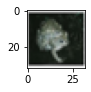

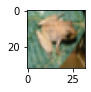

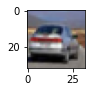

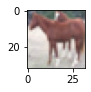

In [8]:
for i in range(232,238):
    plt.subplot(120+1+i)
    img = x_train[i]
    plt.imshow(img)
    plt.show()

In [12]:

X_train = x_train.reshape (x_train.shape [0], 32, 32, 3) 
X_test = x_test.reshape(x_test.shape [0],32, 32, 3) 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255

X_test /= 255

n_classes = 10

print("shape before one-hot encoding: ", y_train.shape) 
Y_train = np_utils.to_categorical (y_train, n_classes) 
Y_test = np_utils.to_categorical (y_test, n_classes) 
print("shape after one-hot encoding: ", Y_train.shape)

shape before one-hot encoding:  (50000, 1)
shape after one-hot encoding:  (50000, 10)


In [ ]:

from keras.models import Sequential

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.4)) 

model.add(Dense(250, activation='relu'))

model.add(Dropout(0.3))

# output layer

model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

#training the model
model.fit(x_train, Y_train, batch_size = 128, epochs = 10, validation_data = (x_test, Y_test))

Epoch 1/10
391/391 [==============================] - 492s 1s/step - loss: 1.5824 - accuracy: 0.4185 - val_loss: 1.1934 - val_accuracy: 0.5872
Epoch 2/10
391/391 [==============================] - 491s 1s/step - loss: 1.0953 - accuracy: 0.6145 - val_loss: 0.9184 - val_accuracy: 0.6788
Epoch 3/10
391/391 [==============================] - 489s 1s/step - loss: 0.9103 - accuracy: 0.6824 - val_loss: 0.7959 - val_accuracy: 0.7247
Epoch 4/10
391/391 [==============================] - 489s 1s/step - loss: 0.7969 - accuracy: 0.7218 - val_loss: 0.7637 - val_accuracy: 0.7362
Epoch 5/10
391/391 [==============================] - 489s 1s/step - loss: 0.7174 - accuracy: 0.7510 - val_loss: 0.7143 - val_accuracy: 0.7553
Epoch 6/10
391/391 [==============================] - 491s 1s/step - loss: 0.6423 - accuracy: 0.7747 - val_loss: 0.6748 - val_accuracy: 0.7713
Epoch 7/10
391/391 [==============================] - 490s 1s/step - loss: 0.5999 - accuracy: 0.7888 - val_loss: 0.6568 - val_accuracy: 0.7794

In [ ]:
 classes = range(0,10)

 names = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

#zip the names and classes to make a dict
class_labels = dict(zip(classes,names))

#generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis = 1)

#make predictions
predictions = model.predict(batch, verbose = 1)

print(predictions)






In [ ]:
for image in predictions:
    print(np.sum(image))

In [ ]:

class_result = np.argmax(predicitions,axis = 1)
print(class_result)

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'prediction: {}\nActal: {}'.format(class_labels[key], class_labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()